<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height="200"> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Métodos Matemáticos Para Engenharia <br></strong></span></div> <br>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>


<div style="border: 2px solid black; padding: 10px; width: 95%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Capítulo 5: Transformada Fourier Discreta
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>5.1 Transformada de Fourier Discreta</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### A função Delta de Dirac e a Propriedade da Filtragem

Muitos fenômenos físicos exigem a representação de uma força muito intensa aplicada em um intervalo de tempo extremamente curto. A função delta de Dirac é uma ferramenta matemática usada para modelar tais situações, onde a força, por mais breve que seja, gera um efeito significativo. Aqui estão alguns exemplos:

- **Explosões Controladas em Construção**: Durante uma demolição controlada, uma explosão gera uma força massiva aplicada em um tempo muito curto. Essa força instantânea é responsável por derrubar grandes estruturas.

- **Colisões Automobilísticas**: Quando dois carros colidem, o impacto entre os veículos acontece em uma fração de segundo, aplicando forças enormes que resultam em deformações nos veículos e possíveis lesões nos ocupantes.

- **Batida em uma Tênis de Mesa**: Quando a raquete de tênis de mesa atinge a bola, a força aplicada à bola ocorre em um intervalo de tempo extremamente curto, causando uma mudança quase instantânea na velocidade e direção da bola.

- **Impacto de Meteoritos**: Quando pequenos meteoritos atingem a atmosfera da Terra, a força de impacto exercida ocorre em um tempo muito curto, gerando grandes quantidades de energia em forma de calor e luz.

Para estudar tais fenômenos, vamos tomar a função pulso unitário em curto intervalo de tempo $[-\epsilon,\epsilon]$ em torno da origem, isto é, um pulso com integral unitária:

<font color='red'> $$\delta_{\epsilon}(t) = \frac{1}{2\epsilon}(u(t+\epsilon) - u(t-\epsilon)) = 
\left\{\begin{array}{}
0, & t < - \epsilon \\
\frac{1}{2\epsilon}, & -\epsilon < t < \epsilon \\
0, & t > \epsilon \\
\end{array}\right.  \tag{1}$$</font>

Um pulso unitário em torno de $t = a$ é representado por:

<font color='red'> $$\delta_{\epsilon}(t-a) = \frac{1}{2\epsilon}(u(t-(a-\epsilon)) - u(t-(a+\epsilon))) = 
\left\{\begin{array}{}
0, & t < a - \epsilon \\
\frac{1}{2\epsilon}, & a - \epsilon < t < a + \epsilon \\
0, & t > a + \epsilon
\end{array}\right.  \tag{2}$$</font>

Temos que $\int_{-\infty}^{\infty}\delta_{\epsilon}(t-a)dt = 1$ para qualquer $\epsilon > 0$. De fato,

<font color='red'>$$\int_{-\infty}^{\infty}\delta_{\epsilon}(t-a)dt = \int_{a-\epsilon}^{a+\epsilon}\frac{1}{2\epsilon}dt = \left.\frac{t}{2\epsilon}\right|_{a-\epsilon}^{a+\epsilon} =  \frac{a+\epsilon}{2\epsilon} - \frac{a-\epsilon}{2\epsilon} = 1 \tag{3}$$</font>

A célula de código a seguir apresenta o gráfico de $\delta_{\epsilon}(t-a)$ para valores de $a$ e $\epsilon$ ajustáveis:

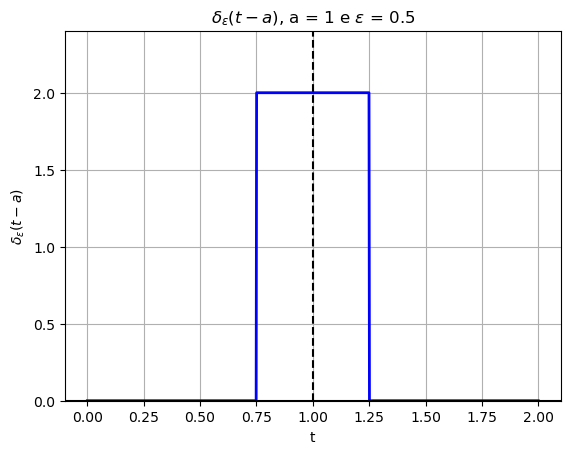

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função retangular para aproximar a delta de Dirac
def delta_epsilon(t, a, epsilon):
    return np.where(np.abs(t - a) < epsilon / 2, 1 / epsilon, 0)

# Parâmetros ajustáveis
a = 1  # Posição de 'a'
epsilon = 0.5  # Largura do intervalo epsilon

# Geração dos valores de 't'
t = np.linspace(0, 2, 1000)

# Cálculo da função delta aproximada
delta_approx = delta_epsilon(t, a, epsilon)

# Criação do gráfico
plt.plot(t, delta_approx, color='blue', linewidth=2)
plt.axvline(x=a, color='black', linestyle='--', label=f'a = {a}')
plt.axhline(0, color='black')
plt.title(r'$\delta_\epsilon(t - a)$, a = {} e $\epsilon$ = {}'.format(a, epsilon))
plt.xlabel('t')
plt.ylabel(r'$\delta_\epsilon(t - a)$')
plt.ylim(0, 1.2 / epsilon)
plt.grid(True)
plt.show()

A função que representa uma grande força instantânea é chamada de **função impulso** ou **função Delta de Dirac** e pode ser definida pelo limite das funções pulsos:

$$\delta(t-a) = lim_{t \to 0} \delta_{\epsilon}(t-a)$$

Este é um limite não deve ser interpretado pontualmente, mas apenas no contexto de uma integral como fornecido a seguir:

$$\delta(t-a) =  
\left\{\begin{array}{}
0, & t \neq a \\
\infty, & t = a
\end{array}\right.  \tag{4}$$

e

$$\int_{-\infty}^{\infty} \delta(t-a)dt = 1$$

Temos o seguinte gráfico (hipotético):

<center> <img src="fig5_a1.png" alt="png_python" width="150"> </center>  

#### <font color='red'> Teorema 1 (Teorema da Filtragem) </font>


<font color='red'> Se $f(t)$ for uma função contínua em torno de $t = a$, então<br><br>
 $$\int_{-\infty}^{\infty} \delta(t-a)f(t)dt = f(a). \tag{5}$$

##### <font color='red'> Demonstração </font>

<font color='red'> Uma forma simples de observar isto é notando que a função Delta de Dirac é nula em todo ponto exceto em $x = a$. Dessa forma,<br><br>
 $$\int_{-\infty}^{\infty}\delta(t-a)f(t)dt \approx \int_{-\infty}^{\infty}\delta(t-a)f(a)dt = f(a)\int_{-\infty}^{\infty}\delta(t-a)dt = f(a)\cdot 1 = f(a).$$

#### Transformada de Fourier Discreta ($F_{N}$)

Considere uma função $f$ definida e contínua no intervalo $[0, 2L]$, conhecida nos pontos igualmente espaçados $x_0, x_1, \ldots, x_n$, em que $f_0 = f(x_0), f_1 = f(x_1), \ldots, f_n = f(x_n)$.

A função $f$ pode ser expressa como uma série de Fourier complexa:

$$
f(x) = \sum_{n = -\infty}^{\infty} c_n e^{in\omega x}, \quad \text{onde} \quad c_n = \frac{1}{2L} \int_0^{2L} f(x) e^{-in\omega x} dx,
\tag{6}
$$

com $\omega = \frac{\pi}{L}$ sendo a frequência angular fundamental e $2L$ o período fundamental.

No caso discreto, a entrada consiste em $f_0, f_1, \ldots$, que são os valores da função $f$ nos pontos igualmente espaçados $x = nT$, onde $n = 0, 1, 2, \dots$ e $T$ é a taxa de amostragem (ou intervalo de amostragem). Se $f$ for contínua em $T$, a amostra de $f$ em $T$ é dada pelo produto $f(x)\delta(x - T)$, onde $\delta(x - T)$ é a função delta de Dirac. A versão discreta de $f$, ou o sinal discreto, pode ser representada pela soma dos impulsos unitários agindo sobre $f$ em $x = nT$:

$$
\sum_{n=-\infty}^{\infty} f(x)\delta(x - nT).
\tag{7}
$$

Se nós aplicarmos a transformada de Fourier ao sinal discreto $(7)$, nos teremos:

$$F(\alpha) =  \int_{-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(x)\delta(x - nT)e^{i\alpha x} dx =  \sum_{n=-\infty}^{\infty} \int_{-\infty}^{\infty}\delta(x - nT)\left[f(x)e^{i\alpha x}\right] dx \tag{8}$$ 

Usando a propriedade da filtragem da função delta de Dirac em $(8)$, temos:

$$ F(\alpha) = \sum_{n = -\infty}^{\infty} f(nT)e^{i\alpha n T} \tag{9}$$


A expressão $F(\alpha)$ em $(9)$ é chamada de transformada discreta de Fourier (DFT) da função $f$. Freqüentemente escrevemos os coeficientes $f(nT)$ como $f(n)$ ou $f_{n}$.

#### Matriz de Transformação $F_{N}$

Sendo $e^{i\alpha x}$ periódico em $\alpha$, temos: 

$$e^{i\alpha T} = e^{i(\alpha T + 2\pi)} = e^{i\left(\alpha + \frac{2\pi}{T}\right)T}, \tag{10}$$

Dessa forma só precisamos considerar a função para $\alpha$ em $\left[0, \frac{2\pi}{T}\right]$. Seja $T = \frac{2\pi}{N}$. Isso coloca $x$ no intervalo $[0, 2L]$. Portanto, como tomamos amostras durante um período, a soma em $(9)$ é na verdade finita.

Consideremos a função $f(x)$ em $N$ pontos igualmente espaçados, $x = nT$, $n = 0,1,2, \ldots, N-1$, no intervalo $[0,2\pi]$, $f(x) = \sum_{n=-\infty}^{\infty} c_{n}e^{inx}$ temos, para $N$ termos e $T = \frac{2\pi}{N}$ que a série de Fourier (finita) $f(x) = \sum_{n = -\infty}^{\infty} c_{n}e^{inx}$ com $N$ termos é dada por:

$$f_{0} = f(0) = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot0} = c_{0}e^{i\cdot0\cdot0} + c_{1}e^{i\cdot1\cdot0} + c_{2}e^{i\cdot2\cdot0} + \ldots + c_{N-1}e^{i\cdot(N-1)\cdot0}$$

$$f_{1} = f(T) = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot T} = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot \frac{2\pi}{N}} = c_{0}e^{i\cdot0\cdot\frac{2\pi}{N}} + c_{1}e^{i\cdot1\cdot\frac{2\pi}{N}} + c_{2}e^{i\cdot2\cdot\frac{2\pi}{N}} + \ldots + c_{N-1}e^{i\cdot(N-1)\cdot\frac{2\pi}{N}}$$

$$f_{2} = f(2T) = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot 2T} = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot \frac{4\pi}{N}} = c_{0}e^{i\cdot0\cdot\frac{4\pi}{N}} + c_{1}e^{i\cdot1\cdot\frac{4\pi}{N}} + c_{2}e^{i\cdot2\cdot\frac{4\pi}{N}} + \ldots + c_{N-1}e^{i\cdot(N-1)\cdot\frac{4\pi}{N}}$$

$$\vdots$$

$$f_{N-1} = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot (N-1)T} = \sum_{n = 0}^{N-1} c_{n}e^{in\cdot \frac{(N-1)2\pi}{N}} = c_{0}e^{i\cdot0\cdot\frac{(N-1)2\pi}{N}} + c_{1}e^{i\cdot1\cdot\frac{(N-1)2\pi}{N}} + c_{2}e^{i\cdot2\cdot\frac{(N-1)2\pi}{N}} + \ldots + c_{N-1}e^{i\cdot(N-1)\cdot\frac{(N-1)2\pi}{N}}$$

Se fizermos $\omega_{N} = e^{\frac{i2\pi}{N}} = cos\left(\frac{2\pi}{N}\right) + isen\left(\frac{2\pi}{N}\right)$, temos que:

$$e^{\frac{ki2\pi}{N}} = \left(e^{\frac{i2\pi}{N}} \right)^{k} = \omega_{N}^{k}.$$

Assim, podemos reescrever $f_{0}, f_{1}, f_{2}, \ldots, f_{N-1}$ como:

<font color='red'>$$\begin{array}{}
f_{0} & = & c_{0} & + & c_{1} & + & c_{2} & + & c_{3} & + & \ldots & + & c_{N-1} \\
f_{1} & = & c_{0} & + & c_{1}\omega_{N} & + & c_{2}\omega_{N}^{2} & + & c_{3}\omega_{N}^{3} &  + & \ldots & + & c_{N-1}\omega_{N}^{N-1} \\
f_{2} & = & c_{0} & + & c_{1}\omega_{N}^{2} & + & c_{2}\omega_{N}^{4} & + & c_{3}\omega_{N}^{6} & + & \ldots & + & c_{N-1}\omega_{N}^{2(N-1)} \\
& & & & & \vdots & & & & &\\
f_{N-1} & = & c_{0} & + & c_{1}\omega_{N}^{N-1} & + & c_{2}\omega_{N}^{2(N-1)} & + & c_{3}\omega_{N}^{3(N-1)} & + & \ldots & + & c_{N-1}\omega_{N}^{(N-1)^{2}} \\
\end{array} \tag{11}$$</font>

Podemos usar matrizes para escrever $(11)$ como:

<font color='red'>$$\begin{bmatrix}{}
f_{0} \\
f_{1} \\
f_{2} \\
\vdots \\
f_{N-1} \\
\end{bmatrix} 
= \begin{bmatrix}{}
1 & 1 & 1 & \ldots & 1 \\
1 & \omega_{N} & \omega_{N}^{2} & \omega_{N}^{3} & \ldots & \omega_{N}^{N-1}\\
1 & \omega_{N}^{2} & \omega_{N}^{4} & \omega_{N}^{6} & \ldots & \omega_{N}^{2(N-1)}\\
\vdots & & \vdots & & \vdots\\
1 & \omega_{N}^{N-1} & \omega_{N}^{2(N-1)} & \omega_{N}^{2} & \ldots & \omega_{N}^{(N-1)^{2}}\\
\end{bmatrix}
\begin{bmatrix}{}
c_{0} \\
c_{1} \\
c_{2} \\
\vdots \\
c_{N-1} \\
\end{bmatrix} \tag{12}$$</font>

Denotemos a matriz $N \times N$ dada em $(12)$ por $F_{N}$.

#### <font color='blue'> Exemplo 1 </font>

<font color='blue'> Determine a matriz $F_{3}$ associada ao cálculo dos coeficientes da tranformada discreta de Fourier:

##### <font color='blue'> Solução </font>

<font color='blue'> Devemos obter $\omega_{3}$ e algumas de suas pontências para obter:<br><br>
 $$F_{3} = \begin{bmatrix}{}
 1 & 1 & 1 \\
 1 & \omega_{3} & \omega_{3}^{2}\\
 1 & \omega_{3}^{2} & \omega_{3}^{4} \\
 \end{bmatrix}
 $$
 Precisamos calcular os valores das potências de $\omega_{3}$.<br><br>
 Sendo $\omega_{3} = e^{\frac{i2\pi}{3}} = cos\left(\frac{2\pi}{3}\right) + icos\left(\frac{2\pi}{3}\right) = -\frac{1}{2} + i\frac{\sqrt{3}}{2}$. Temos que<br><br>
 $\omega_{3}^{2} = \left(-\frac{1}{2} + i\frac{\sqrt{3}}{2}\right)^{2} = -\frac{1}{2} - i\frac{\sqrt{3}}{2}$<br><br>
 $\omega_{3}^{3} = \omega_{3}\omega_{3}^{2} = \left(-\frac{1}{2} + i\frac{\sqrt{3}}{2}\right)\left(-\frac{1}{2} + i\frac{\sqrt{3}}{2}\right)^{2} = \left(-\frac{1}{2} + i\frac{\sqrt{3}}{2}\right)\left(-\frac{1}{2} - i\frac{\sqrt{3}}{2}\right) = 1$ (óbvio)<br><br>
 $\omega_{3}^{4} = \omega_{3}\omega_{3}^{3} = \omega_{3} = -\frac{1}{2} + i\frac{\sqrt{3}}{2}$<br><br>
 Assim,<br><br>
 $$F_{3} = \begin{bmatrix}{}
 1 & 1 & 1 \\
 1 & \omega_{3} & \omega_{3}^{2}\\
 1 & \omega_{3}^{2} & \omega_{3}^{4} \\
 \end{bmatrix} =
 \begin{bmatrix}
1 & 1 & 1 \\
1 & -\frac{1}{2} + i \frac{\sqrt{3}}{2} & -\frac{1}{2} - i \frac{\sqrt{3}}{2} \\
1 & -\frac{1}{2} - i \frac{\sqrt{3}}{2} & -\frac{1}{2} + i \frac{\sqrt{3}}{2}
\end{bmatrix} $$<br>
 No Python, temos:

In [2]:
import numpy as np

def gerar_FN(N):
    """Gera a matriz DFT para um dado N."""
    omega = np.exp(2j * np.pi / N)  # N-ésima raiz de unidade
    F_N = np.array([[omega**(i*j) for j in range(N)] for i in range(N)])
    return F_N

In [3]:
# Gerando F3
np.round(gerar_FN(3),10)

array([[ 1. +0.j       ,  1. +0.j       ,  1. +0.j       ],
       [ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j],
       [ 1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j]])

#### <font color='blue'> Exemplo 2 </font>

<font color='blue'> Determine a matriz $F_{4}$ associada ao cálculo dos coeficientes da tranformada discreta de Fourier:

##### <font color='blue'> Solução </font>

<font color='blue'> *Determinando $F_{3}$*: 
 *Determinando $F_{4}$*: Analogamente, temos:<br><br>
 $$F_{4} = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & \omega_{4} & \omega_{4}^{2} & \omega_{4}^{3}\\
 1 & \omega_{4}^{2} & \omega_{4}^{4} & \omega_{4}^{6}\\
 1 & \omega_{4}^{3} & \omega_{4}^{6} & \omega_{4}^{9}\\
 \end{bmatrix}
 $$
 Precisamos calcular os valores das potências de $\omega_{4}$.<br><br>
 Sendo $\omega_{4} = e^{\frac{i2\pi}{4}} = cos\left(\frac{\pi}{2}\right) + icos\left(\frac{\pi}{2}\right) = i$. Temos que<br><br>
 $\omega_{4}^{2} = i^{2} = -1$<br><br>
 $\omega_{4}^{3} = i^{3} = i^{2}i = -i$<br><br>
 $\omega_{4}^{4} = i^{2}i^{2} = 1$<br><br>
 $\omega_{4}^{6} = i^{4}i^{2} = -1$<br><br>
 $\omega_{4}^{9} = i^{4}i^{4}i = i$<br><br>
 Assim,<br><br>
 $$F_{4} = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & \omega_{4} & \omega_{4}^{2} & \omega_{4}^{3}\\
 1 & \omega_{4}^{2} & \omega_{4}^{4} & \omega_{4}^{6}\\
 1 & \omega_{4}^{3} & \omega_{4}^{6} & \omega_{4}^{9}\\
 \end{bmatrix} =
 \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & i & -1 & -i\\
 1 & -1 & 1 & -1\\
 1 & -i & -1 & i\\
 \end{bmatrix}$$<br>

In [4]:
import numpy as np

def gerar_FN(N):
    """Gera a matriz DFT para um dado N."""
    omega = np.exp(2j * np.pi / N)  # N-ésima raiz de unidade
    F_N = np.array([[omega**(i*j) for j in range(N)] for i in range(N)])
    return F_N

In [5]:
# Gerando F4
np.round(gerar_FN(4),10)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j],
       [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
       [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j]])

Para uma melhor visualização podemos arredondar os valores de "F_N":

In [6]:
# Gerando F4 arredondados
np.round(gerar_FN(4),5)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j],
       [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
       [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j]])

#### Coeficientes de Fourier $c_{i}$

Note que a obteção dos coeficientes de Fourier $c_{0},c_{1},c_{2},\ldots,c_{N-1}$ em $(12)$ exige a solução de um sistema linear $N \times N$. Felizmente, este sistema apresenta uma solução bastante simples. Sendo $\overline{F}_{N}$ a matriz consistindo das entradas de $F_{N}$ e $I_{N}$ a matriz identidade de ordem $N$ é possível mostrar que

<font color='red'>$$F_{N}\overline{F}_{N} = \overline{F}_{N}F_{N} = NI_{N} \Rightarrow F_{N}^{-1} = \frac{1}{N}\overline{F}_{N} \tag{13}$$</font>

donde segue que:

<font color='red'>$$\begin{bmatrix}{}
c_{0} \\
c_{1} \\
c_{2} \\
\vdots \\
c_{N-1} \\
\end{bmatrix} = 
\frac{1}{N}\overline{F}_{N}
\begin{bmatrix}{}
f_{0} \\
f_{1} \\
f_{2} \\
\vdots \\
f_{N-1} \\
\end{bmatrix}. \tag{14}$$</font>

In [7]:
import numpy as np

def gerar_FN_conjugada(N):
    """Gera a matriz DFT para um dado N."""
    omega = np.exp(2j * np.pi / N)  # N-ésima raiz de unidade
    F_N = np.array([[omega**(i*j) for j in range(N)] for i in range(N)])
    return F_N.conjugate()

np.round(gerar_FN_conjugada(4),10)

array([[ 1.-0.j,  1.-0.j,  1.-0.j,  1.-0.j],
       [ 1.-0.j,  0.-1.j, -1.-0.j, -0.+1.j],
       [ 1.-0.j, -1.-0.j,  1.+0.j, -1.-0.j],
       [ 1.-0.j, -0.+1.j, -1.-0.j,  0.-1.j]])

#### <font color='blue'> Exemplo 3 </font>

<font color='blue'> Verifique que $F_{4}\overline{F}_{4} = 4I_{4}$.

##### <font color='blue'> Solução </font>

<font color='blue'> Aproveitando a matriz $F_{4}$ obtida no **Exemplo 1**, temos que<br><br>
 $$A = F_{4}\overline{F}_{4} = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & i & -1 & -i\\
 1 & -1 & 1 & -1\\
 1 & -i & -1 & i\\
 \end{bmatrix}\begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & -i & -1 & i\\
 1 & -1 & 1 & -1\\
 1 & i & -1 & -i\\
 \end{bmatrix} =$$<br><br>
 Note que os elementos da primeira linha da matriz $F_{4}\overline{F}_{4}$ são:<br><br>
 $a_{11} = 1\cdot1 + 1\cdot1 + 1\cdot1 + 1\cdot1 = 4$<br><br>
 $a_{12} = 1\cdot1 + 1\cdot(-i) + 1\cdot(-1) + 1\cdot i = 0$<br><br>
 $a_{13} = 1\cdot1 + 1\cdot(-1) + 1\cdot1 + 1\cdot(-1) = 0$<br><br>
 $a_{14} = 1\cdot1 + 1\cdot i + 1\cdot(-1) + 1\cdot (-i) = 0$<br><br>
 Calculando os demais elementos, obtemos:<br><br>
 $$F_{4}\overline{F}_{4} = \begin{bmatrix}{}
 4 & 0 & 0 & 0\\
 0 & 4 & 0 & 0\\
 0 & 0 & 4 & 0\\
 0 & 0 & 0 & 4\\
 \end{bmatrix} = 4\begin{bmatrix}{}
 1 & 0 & 0 & 0\\
 0 & 1 & 0 & 0\\
 0 & 0 & 1 & 0\\
 0 & 0 & 0 & 1\\
 \end{bmatrix} = 4I_{4}$$

#### <font color='blue'> Exemplo 4 </font>

<font color='blue'> Consideremos uma função $f$ tal que $f(0) = 0$, $f\left(\frac{\pi}{2}\right) = 2$, $f(\pi) = 4$ e $f\left(\frac{3\pi}{2}\right) = 6$.<br><br>
 a) Calcule $F(0), F(1), F(2)$ e $F(3)$ usando $F(\alpha) = \sum_{n=0}^{3}f(nT)e^{i\alpha nT}$.<br><br>
 b) Determine os coeficientes da transformada discreta de Fourier usando matrizes.<br><br>
 c) Verifique que $|c_{k}| = \frac{1}{4}|F(k)|$ para todo $k = 0,1,2,3$.

##### <font color='blue'> Solução </font>

<font color='blue'> a) Temos que $F(\alpha) = \sum_{n=0}^{3}f(nT)e^{i\alpha nT}$ com $T = \frac{\pi}{2}$. Assim,<br>
 $$F(0) = \sum_{n=0}^{3}f(n\frac{\pi}{2})e^{i\cdot0\cdot n\frac{\pi}{2}} = 0 + 2 + 4 + 6 = 12$$<br>
 $$F(1) = \sum_{n=0}^{3}f(n\frac{\pi}{2})e^{i\cdot1\cdot n\frac{\pi}{2}} = 0 + 2e^{i\frac{\pi}{2}} + 4e^{i\pi} +6e^{i\frac{3\pi}{2}} =$$<br>
 $$=0 + 2\left(cos\left(\frac{\pi}{2}\right) + isen\left(\frac{\pi}{2}\right)\right) +  4(cos(\pi) + isen(\pi)) + 6\left(cos\left(\frac{3\pi}{2}\right) + isen\left(\frac{3\pi}{2}\right)\right) = $$<br>
 $$ = 0 + 2(0 + i) + 4(-1 + 0) + 6(0 - i) = 2i - 4 - 6i = -4 - 4i$$<br>
 $$F(2) = \sum_{n=0}^{3}f(n\frac{\pi}{2})e^{i\cdot2\cdot n\frac{\pi}{2}} = 0 + 2e^{i\frac{2\pi}{2}} + 4e^{2i\pi} +6e^{i\frac{2\cdot3\pi}{2}} = 0 + 2e^{i\pi} + 4e^{2i\pi} +6e^{i3\pi}$$<br>
 $$=0 + 2(cos(\pi) + isen(\pi)) +  4(cos(2\pi) + isen(2\pi)) + 6(cos(3\pi) + isen(3\pi)) = $$<br>
 $$ = 0 + 2(-1 + 0i) + 4(1 + 0i ) + 6(-1 + 0i) = -2 + 4 - 6 = -4$$<br>
 $$F(3) = \sum_{n=0}^{3}f(n\frac{\pi}{2})e^{i\cdot3\cdot n\frac{\pi}{2}} = 0 + 2e^{i\frac{3\pi}{2}} + 4e^{3i\pi} +6e^{i\frac{3\cdot3\pi}{2}} = 0 + 2e^{i\frac{3\pi}{2}} + 4e^{3i\pi} +6e^{i\frac{9\pi}{2}}$$<br>
 $$=0 + 2\left(cos\left(\frac{3\pi}{2}\right) + isen\left(\frac{3\pi}{2}\right)\right) +  4(cos(3\pi) + isen(3\pi)) + 6\left(cos\left(\frac{9\pi}{2}\right) + isen\left(\frac{9\pi}{2}\right)\right) =  $$<br>
 $$ = 0 + 2(0 - i) + 4(-1 + 0i) + 6(0 + i) = -2i -4 + 6i = -4 + 4i$$<br>
 b) Sabemos, conforme $(14)$, que os coeficientes de Fourier são dados por:<br><br>
 $$\begin{bmatrix}{}
c_{0} \\
c_{1} \\
c_{2} \\
c_{3} \\
\end{bmatrix} = 
\frac{1}{4}\overline{F}_{4}
\begin{bmatrix}{}
f_{0} \\
f_{1} \\
f_{2} \\
f_{3} \\
\end{bmatrix}.$$<br>
 Assim,<br><br>
 $$\begin{bmatrix}{}
c_{0} \\
c_{1} \\
c_{2} \\
c_{3} \\
\end{bmatrix} = 
\frac{1}{4}
\begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & -i & -1 & i\\
 1 & -1 & 1 & -1\\
 1 & i & -1 & -i\\
 \end{bmatrix}\cdot \begin{bmatrix}{}
0 \\
2 \\
4 \\
6 \\
\end{bmatrix} = \frac{1}{4}\begin{bmatrix}{}
0 + 2 + 4 + 6 \\
0 - 2i - 4 + 6i \\
0 - 2 + 4 - 6 \\
0 - 2i - 4 - 6i \\
\end{bmatrix} = \begin{bmatrix}{}
3 \\
-1 + i \\
-1 \\
-1 - i \\
\end{bmatrix}$$<br>
 c) Note que<br><br>
 $|c_{0}| = |3| = 3$<br><br>
 $|c_{1}| = |-1 + i| = \sqrt{(-1)^{2} + 1^{2}} = \sqrt{2}$<br><br>
 $|c_{2}| = |-1| = 1$<br><br>
 $|c_{3}| = |-1 - i| = \sqrt{(-1)^{2} + (-1)^{2}} = \sqrt{2}$<br>
 $\frac{1}{4}|F(0)| = \frac{1}{4}|12| = 3 = |c_{0}|$<br><br>
 $\frac{1}{4}|F(1)| = \frac{1}{4}|-4 - 4i| = \frac{1}{4}\sqrt{(-4)^{2} + (-4)^{2}} = \frac{1}{4}\sqrt{32} = \frac{1}{4}4\sqrt{2} = \sqrt{2} = |c_{1}|$<br><br>
 $\frac{1}{4}|F(2)| = \frac{1}{4}|-4| = 1$<br><br>
 $\frac{1}{4}|F(3)| = \frac{1}{4}|-4 + 4i| = \frac{1}{4}\sqrt{4^{2} + (-4)^{2}} = \frac{1}{4}\sqrt{32} = \frac{1}{4}4\sqrt{2} = \sqrt{2} = |c_{3}|$<br><br>
 No Python, temos:

In [2]:
# Item "a"
import numpy as np

# Valores da função em nT, n = 0, 1, 2, 3
f = np.array([0, 2, 4, 6])

N = len(f)
X = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        X[k] += f[n] * (np.exp(1j * 2 * np.pi * k * n / N).conjugate())
        
print("DFT:", np.round(X,10))

DFT: [12.+0.j -4.+4.j -4.-0.j -4.-4.j]


In [4]:
# Item "b"
def gerar_FN(N):
    """Gera a matriz DFT para um dado N."""
    omega = np.exp(2j * np.pi / N)  # N-ésima raiz de unidade
    FN = np.array([[omega**(k*j) for j in range(N)] for k in range(N)])
    return FN

# Valores da função em nT, n = 0, 1, 2, 3
f = np.array([0, 2, 4, 6])
N = len(f)

FN_conjugada = gerar_FN(4).conjugate()

print("Coeficientes:", np.round(FN_conjugada@f/N,10))

Coeficientes: [ 3.+0.j -1.+1.j -1.-0.j -1.-1.j]


In [10]:
# Item "c"
verificacao = (np.round(FN_conjugada@f/N,10) == (1/N)*np.round(X,10))
print(verificacao)

[ True  True  True  True]


#### Par da Transformada de Fourier Discreta

Valem as seguintes relações:

<font color='red'> $$c = \frac{1}{N}\overline{F}_{N}f \ \ \ \ \text{e} \ \ \ \ f = F_{N}c \tag{15}$$</font>

em que

$$c = \begin{bmatrix}{}
c_{0} \\
c_{1} \\
c_{2} \\
\vdots \\
c_{N-1} \\
\end{bmatrix} \ \ \ \ \text{e} \ \ \ \ 
f = \begin{bmatrix}{}
f_{0} \\
f_{1} \\
f_{2} \\
\vdots \\
f_{N-1} \\
\end{bmatrix}.$$

#### <font color='blue'> Exemplo 5 </font>

<font color='blue'> Verifique as relações $(15)$ considerando o **Exemplo 4**:

##### <font color='blue'> Solução </font>

<font color='blue'> Temos que<br><br>
 $$c =\begin{bmatrix}{}
3 \\
-1 + i \\
-1 \\
-1 - i \\
\end{bmatrix}, \ \ f =\begin{bmatrix}{}
0 \\
2 \\
4 \\
6 \\
\end{bmatrix}, \ \ F_{4} = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & i & -1 & -i\\
 1 & -1 & 1 & -1\\
 1 & -i & -1 & i\\
 \end{bmatrix} \ \ e \ \ \overline{F}_{4} = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & -i & -1 & i\\
 1 & -1 & 1 & -1\\
 1 & i & -1 & -i\\
 \end{bmatrix}$$<br>
 i) Verifiquemos que $c = \frac{1}{4}\overline{F}_{4}f$:<br><br>
 $$\frac{1}{4}\overline{F}_{4}f = \frac{1}{4}\begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & -i & -1 & i\\
 1 & -1 & 1 & -1\\
 1 & i & -1 & -i\\
 \end{bmatrix} \cdot  
 \begin{bmatrix}{}
0 \\
2 \\
4 \\
6 \\
\end{bmatrix} = \frac{1}{4}\begin{bmatrix}{}
0 + 2 + 4 + 6 \\
0 - 2i - 4 + 6i \\
0 - 2 + 4 - 6 \\
0 + 2i - 4 -6i \\
\end{bmatrix} = \frac{1}{4}\begin{bmatrix}{}
12 \\
-4 + 4i \\
-4 \\
-4 - 4i \\
\end{bmatrix} = \begin{bmatrix}{}
3 \\
-1 + i \\
-1 \\
-1 - i \\
\end{bmatrix} = c$$<br>
 ii) Verifiquemos que $f = F_{4}c$:<br><br>
 $$F_{4}c = \begin{bmatrix}{}
 1 & 1 & 1 & 1\\
 1 & i & -1 & -i\\
 1 & -1 & 1 & -1\\
 1 & -i & -1 & i\\
 \end{bmatrix} \cdot
 \begin{bmatrix}{}
3 \\
-1 + i \\
-1 \\
-1 - i \\
\end{bmatrix} = \begin{bmatrix}{}
3 - 1 + i - 1 - 1 -i \\
3 - i - 1 + 1 + i - 1 \\
3 + 1 - i - 1 + 1 + i \\
3 + i + 1 + 1 - i + 1 \\
\end{bmatrix} = \begin{bmatrix}{}
0 \\
2 \\
4 \\
6 \\
\end{bmatrix} = f$$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>5.2 Transformada Rápida de Fourier</strong></span></font>

<hr style="border: 2px solid black;">
</div>
 

Nesta seção, veremos de forma sucinta, a Transformada Rápida de Fourier ($\text{FFT}$), uma técnica que aprimora a eficiência da transformada discreta de Fourier, reduzindo sua complexidade computacional de $O(N^{2})$ para $O(Nlog(N))$. Utilizaremos o algoritmo de Cooley e Tukey, introduzido em $1965$, que foi um marco significativo na computação numérica, permitindo o processamento de grandes conjuntos de dados em tempo real.

A velocidade deste algoritmo é explicada observando:

**i) Uso de Simetria**: As propriedades simétricas e periódicas das raízes da unidade fazem com que muitos cálculos sejam repetitivos em uma $\text{DFT}$. Por outro lado a $\text{FFT}$ lança mão desta propriedades a fim de reduzir a computação desnecessária.

**ii) Quantidade de Multiplicações**: Em uma $\text{DFT}$ padrão, cada termo de saída é o resultado de $N$ multiplicações complexas. A $\text{FFT}$ reduz essa quantidade drasticamente ao dividir o problema em parcelas menores, cada uma com menos multiplicações a realizar.

Vejamos a seguir a aplicação do algoritmo de Cooley e Tukey para $N = 4$ e $N = 8$:

#### Exemplificando o Algoritmo de Cooley e Tukey (N = 4)

Para facilitar consideremos uma função $f$ em quatro saídas associadas $f_0 = 0, f_1 = 2, f_2 = 4, f_3 = 6$.

##### Esquema Simplificado

<center> <img src="fig5_1.png" alt="png_python" width="550"> </center><br>

##### Explicação

**Passo 1**: Dividir em Índices Pares e Ímpares

- **Pares**: $f_0, f_2 = [0, 4]$

- **Ímpares**: $f_1, f_3 = [2, 6]$

**Passo 2**: Calcular a $\text{FFT}$ dos subvetores

- **$\text{FFT}$ de $[0, 4]$**:

  - $F_0 = 0 + 4 = 4$
  
  - $F_1 = 0 - 4 = -4$
  

- **$\text{FFT}$ de $[2, 6]$**:

  - $F_0 = 2 + 6 = 8$
  
  - $F_1 = 2 - 6 = -4$
  

**Passo 3**: Aplicar os fatores de giro

Após calcular as $\text{FFTs}$ dos subvetores, combinamos os resultados usando os fatores de giro. Para um vetor de tamanho $N$, os fatores de giro são dados por $\omega_N^k = e^{-\frac{2\pi i k}{N}}$, onde $k$ varia de $0$ a $N - 1$.

Para cada nível de recursão, as saídas das $\text{FFTs}$ parciais são combinadas para formar a FFT do vetor original. A combinação é feita como segue para um vetor de tamanho $4$:

Para $k = 0, 1$ (metade inferior do vetor de saída):

- $F(k) = \text{FFT}_{\text{par}}(k) + \omega_4^k \times \text{FFT}_{\text{ímpar}}(k)$

- $F(k+2) = \text{FFT}_{\text{par}}(k) - \omega_4^k \times \text{FFT}_{\text{ímpar}}(k)$

  - $\omega_4^0 = e^{-\frac{2\pi i \cdot 0}{4}} = cos(0) + isen(0) = 1$
  
  - $\omega_4^1 = e^{-\frac{2\pi i \cdot 1}{4}} = cos\left(-\frac{\pi}{2}\right) + isen\left(-\frac{\pi}{2}\right) = -i$

- **Combinação para $k = 0$**:

  - $F(0) = 4 + 1 \cdot 8 = 12$
  
  - $F(2) = 4 - 1 \cdot 8 = -4$

- **Combinação para $k = 1$**:

  - $F(1) = -4 + (-i)(-4) = -4 + 4i$
  
  - $F(3) = -4 - (-i)(-4) = -4 - 4i$
  

**Resultado Final:**

$F = (12, -4 + 4i, -4, -4 - 4i)$

#### Exemplificando o Algoritmo de Cooley e Tukey (N = 8)

Analogamente ao feito para $N = 4$, consideremos uma função $f$ em oito saídas associadas $f_{0} = 0, f_{1} = 2, f_{2} = 4, f_{3} = 6, f_{4} = 8, f_{5} = 10, f_{6} = 12,$ $f_{7} = 14$.

##### Esquema Simplificado

<center> <img src="fig5_2.png" alt="png_python" width="800"> </center>

##### Explicação

 Neste caso, os fatores de giro serão efetivamente:

- $\omega_8^0 = e^{-\frac{2\pi i \cdot 0}{8}} = cos(0) + isen(0)$

- $\omega_8^1 = e^{-\frac{2\pi i \cdot 1}{8}} = cos\left(-\frac{\pi}{4}\right) + isen\left(-\frac{\pi}{4}\right) =\frac{\sqrt{2}}{2} - i\frac{\sqrt{2}}{2}$

- $\omega_8^2 = e^{-\frac{2\pi i \cdot 2}{8}} = cos\left(-\frac{\pi}{2}\right) + isen\left(-\frac{\pi}{2}\right) = -i$
  
- $\omega_8^3 = e^{-\frac{2\pi i \cdot 3}{8}} = cos\left(-\frac{3\pi}{4}\right) + isen\left(-\frac{3\pi}{4}\right) = -\frac{\sqrt{2}}{2} - i\frac{\sqrt{2}}{2}$

**Resultado Final:**

$F = (56, -8 + 8(1 + \sqrt{2})i, -8 + 8i,-8 + 8(\sqrt{2} - 1)i, -8, -8 + 8(1 - \sqrt{2})i, -8 - 8i, -8 - 8(1 + \sqrt{2})i)$

ou mais aproximadamente (para fins de comparação - Python)

$F \approx (56, -8 + 19.3137085i, -8 + 8i,-8 + 3.3137085i, -8, -8 -3.3137085i, -8 - 8i, -8 - 19.3137085i)$

O cálculo da FFT para $N = 8, 16,32,\ldots$ segue implementado na célula de código a seguir:

In [11]:
import numpy as np

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    # Combina resultados e retorna
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

In [12]:
# Cooley e Tukey N = 4
x = np.array([0, 2, 4, 6])
X = np.array(fft(x))  # divida X por len(x) para ter os coeficientes
print("FFT do vetor:", X)

FFT do vetor: [12.+0.j -4.+4.j -4.+0.j -4.-4.j]


In [13]:
# Cooley e Tukey N = 4
x = np.array([0, 2, 4, 6, 8, 10, 12, 14])
X = np.array(fft(x))  # divida X por len(x) para ter os coeficientes
print("FFT do vetor:", X)

FFT do vetor: [56. +0.j        -8.+19.3137085j -8. +8.j        -8. +3.3137085j
 -8. +0.j        -8. -3.3137085j -8. -8.j        -8.-19.3137085j]


Se preferir, temos a função já implementada em Python para o cálculo dos coeficientes:

In [23]:
import numpy as np

# Dados de exemplo N = 4
f = np.array([0, 2, 4, 6])

# Usando a FFT para calcular a Transformada de Fourier
fft = np.fft.fft(f)

# Coeficientes normalizados da FFT
c_fft = fft/len(f)

# Mostrando a FFT e os coeficientes normalizados
print(f"FFT de f: {fft} \n")
print(f"Coeficientes da FFT de f: {c_fft}")

FFT de f: [12.+0.j -4.+4.j -4.+0.j -4.-4.j] 

Coeficientes da FFT de f: [ 3.+0.j -1.+1.j -1.+0.j -1.-1.j]


In [24]:
import numpy as np

# Dados de exemplo N = 8
f = np.array([0, 2, 4, 6, 8, 10, 12, 14])

# Usando a FFT para calcular a Transformada de Fourier
fft = np.fft.fft(f)

# Coeficientes normalizados da FFT
c_fft = fft/len(f)

# Mostrando a FFT e os coeficientes normalizados
print(f"FFT de f: {fft} \n")
print(f"Coeficientes da FFT de f: {c_fft}")

FFT de f: [56. +0.j        -8.+19.3137085j -8. +8.j        -8. +3.3137085j
 -8. +0.j        -8. -3.3137085j -8. -8.j        -8.-19.3137085j] 

Coeficientes da FFT de f: [ 7.+0.j         -1.+2.41421356j -1.+1.j         -1.+0.41421356j
 -1.+0.j         -1.-0.41421356j -1.-1.j         -1.-2.41421356j]


A função Python já implementada "np.fft.fft" nos permite calcularmos a FFT para um vetor com quantidade de entradas não necessariamente da forma $2^{n}$.

In [22]:
import numpy as np

# Dados de exemplo N = 5
f = np.array([0, 2, 4, 6, 8])

# Usando a FFT para calcular a Transformada de Fourier
fft = np.fft.fft(f)

# Coeficientes normalizados da FFT
c_fft = fft/len(f)

# Mostrando a FFT e os coeficientes normalizados
print(f"FFT de f: {fft} \n")
print(f"Coeficientes da FFT de f: {c_fft}")

FFT de f: [20.+0.j         -5.+6.8819096j  -5.+1.62459848j -5.-1.62459848j
 -5.-6.8819096j ] 

Coeficientes da FFT de f: [ 4.+0.j         -1.+1.37638192j -1.+0.3249197j  -1.-0.3249197j
 -1.-1.37638192j]


# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Exercício 1

Consideremos uma função $f$ tal que $f(0) = 0$, $f\left(\frac{\pi}{2}\right) = 1$, $f(\pi) = 2$ e $f\left(\frac{3\pi}{2}\right) = 3$. Usando $DFT$:

a) Calcule $F(0), F(1), F(2)$ e $F(3)$ usando $F(\alpha) = \sum_{n=0}^{3}f(nT)e^{i\alpha nT}$.
 
b) Determine os coeficientes da transformada discreta de Fourier.
 
*Dica: Lembre-se que $f(0) = f_{0}, f\left(\frac{\pi}{2}\right) = f_{1}, f(\pi) = f_{2}$ e $f\left(\frac{3\pi}{2}\right) = f_{3}$.*

#### Exercício 2

Responda o **Exercício 1** usando $FFT$.

#### Exercício 3

Consideremos uma função $f$ tal que $f_{0} = 0$, $f_{1} = 1 $, $f_{2} = 1$, $f_{3} = 2$, $f_{4} = 2$, $f_{5} = 3$, $f_{6} = 3$ e $f_{7} = 4$. Usando $FFT$:

a) Calcule $F(0), F(1), F(2), \dots, F(7)$.
 
b) Determine os coeficientes da transformada discreta de Fourier.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Respostas dos Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Resposta do Exercício 1

a) $F = (6, -2 + 2i, -2, -2-2i)$

b) $c = \left(\frac{3}{2}, -\frac{1}{2} + \frac{1}{2}i, -\frac{1}{2}, -\frac{1}{2} - \frac{1}{2}i \right)$ (basta dividir a resposta dos item "a" por $4$)

#### Resposta do Exercício 2

Mesma do **Exercício 1**!

#### Resposta do Exercício 3

a) $F \approx (16, -2+4.82842712i, -2+2i, -2+0.82842712i, -4, -2-0.82842712i, -2-2i, -2-4.82842712i)$

b) $c \approx (2, -0.25+0.60355339i, -0.25i + 0.25i, -0.25+0.10355339i, -0.5, -0.25-0.10355339i, -0.25-0.25i, -0.25-0.60355339i)$ (basta dividir a resposta do item "a" por $8$.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Vídeo Aulas</strong></span></font>

<hr style="border: 2px solid black;">
</div>

Clicando nos links a seguir você será redirecionado às aulas referentes a este capítulo:



# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Referências</strong></span></font>

<hr style="border: 2px solid black;">
</div>

$[0]$ Bibliografia constante no Projeto Pedagógico do Curso de Engenharia Elétrica 2023.

$[1]$ FERNANDEZ, C. de S.; BERNANDES JÚNIOR, N. Introdução às funções de uma variável complexa. Rio de Janeiro: SBM, 2016.

$[2]$ BUTKOV, E. Física matemática. Rio de Janeiro: LTC, 1988.

$[3]$ RILEY, K. F.; HOBSON, M. P.; BENCE, S. J. Mathematical methods for physics and engineering. 3rd ed. Cambridge: Cambridge University Press, 2006.

$[4]$ SANTOS, R. J., Transformada de Fourier. Belo Horizonte: Universidade Federal de Minas Gerais, 2017.

$[5]$ SAUTER, E., AZEVEDO, F. S., STRAUCH, I. M. F, Transformada de Laplace: Um Livro Colaborativo. UFRGS, 2022.

$[6]$ SOARES, A. Curso Python Com Jupyter Notebook. Instituto Federal da Bahia, Campus Vitória da Conquista, $2023$. Disponível em https://github.com/ProfAllanIFBA/Curso_Python_Com_Jupyter_Notebook

$[7]$ SPIEGEL, M. R. Advanced mathematics for engineers and scientists. New York: McGraw-Hill, 1971.

$[8]$ SPIEGEL, M. R. Cálculo Avançado. São Paulo: McGraw-Hill, 1971.

$[9]$ ZILL, D. G.; CULLEN, M. R. Matemática avançada para engenharia, v.3: equações diferenciais parciais, métodos de Fourier e variáveis complexas. 3 ed. Porto Alegre: Bookman, 2009.

$[10]$ ZILL, D. G., Advanced Engineering Mathematics. 6rd ed. Jones & Bartlett Learning 2017.

$[11]$ ZILL, D. G., CULLEN, M. R. Equações Diferenciais. v1, 3 ed. São Paulo: Makron Books, 2001.